<a href="https://colab.research.google.com/github/ethereins/DIF62130_B_25_2311532016/blob/main/PRAKTIKUM5ML/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reduksi Dimensi

Pada praktikum ini, kita menggunakan dataset iris (bunga iris) yang terdiri dari 3 spesies Iris, masing-masingnya memiliki data berjumlah 50 sampel. Fiturnya ada 4, yakni sepal length, petal length, sepal width, petal width.

In [6]:
import pandas as pd
import numpy as np

In [7]:
from sklearn.datasets import load_iris

Kode ini dapat memanggil dataset bawaan yang disediakan oleh google colab untuk latihan pengolahan data.

In [8]:
iris = load_iris()

X = iris['data']
y = iris['target']

n_samples, n_features = X.shape

print(f'Jumlah sample data: {n_samples}')
print(f'Jumlah fitur: {n_features}')

Jumlah sample data: 150
Jumlah fitur: 4


Setelah fitur dan label dipisahkan, kita dapat mengetahui bahwa terdapat 150 data dan 4 fitur pada dataset ini. Fitur dan label dipisahkan agar dapat memudahkan dalam melatih model nantinya.

Untuk memperoleh gambaran mengenai bagaimana fitur (variabel independen) saling berhubungan/berkorelasi, visualisasikan dengan histogram dan scatterplot.

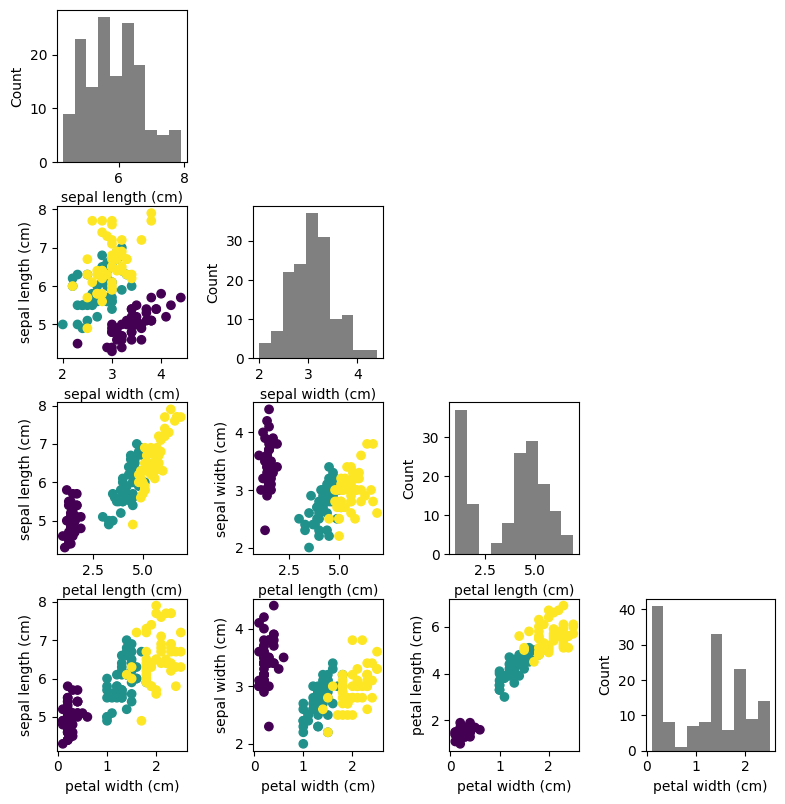

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize=(8, 8))
fig.tight_layout()

names = iris.feature_names

for i, j in zip(*np.triu_indices_from(ax, k=1)):
  ax[j, i].scatter(X[:, j], X[:, i], c=y)
  ax[j, i].set_xlabel(names[j])
  ax[j, i].set_ylabel(names[i])
  ax[i, j].set_axis_off()

for i in range(n_features):
  ax[i, i].hist(X[:, i], color = 'grey')
  ax[i, i].set_ylabel('Count')
  ax[i, i].set_xlabel(names[i])

# 1: Standarisasi Data

Ini memastikan agar algoritme (terutama yang berbasis jarak) dapat memproses kumpulan data secara efisien. Jika data tidak distandarkan, nilai yang lebih besar mungkin akan memiliki bobot/dominasi lebih besar daripada algoritma. Semua data harus berbobot sama, itulah mengapa standarisasi data penting.

Caranya adalah dengan  menghitung Z-score (nilai standar) untuk setiap nilai dalam kumpulan data dengan cara mengurangi rata-rata fitur/kolom dari setiap nilai x dalam kolom dan membaginya dengan deviasi standar

In [11]:
def mean (x): #np.mean(X, axis = 0)
  return sum(x)/len(x)

def std(x): #np.std(X, axis = 0)
  return(sum((i - mean(x))**2 for i in x)/len(x))**0.5

def Standardize_data(X):
  return(X-mean(X))/std(X)

X_std = Standardize_data(X)

In [12]:
print(X)
print(X_std)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

# 2: Hitung Covariance Matrix

In [20]:
def covariance(x):
  return (x.T @ x) / (x.shape[0] - 1)

cov_mat = covariance(X_std) #np.cov(X_std.T)

In [21]:
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

# 3: Hitung Eigen Vectors dan Eigen Values dari Covariance Matrix


In [23]:
from numpy.linalg import eig

eig_vals, eig_vecs = eig(cov_mat)

max_abs_idx = np.argmax(np.abs(eig_vals), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
eig_vecs = eig_vecs.T

print('Eigen values \n', eig_vals)
print('Eigen vectors \n', eig_vecs)

Eigen values 
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigen vectors 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [ 0.26128628 -0.12350962 -0.80144925  0.52359713]]


# 4: Urutkan eigen vectors dan eigen values

In [24]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i, :]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)

eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

[(np.float64(2.9380850501999918), array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (np.float64(0.920164904162487), array([0.37741762, 0.92329566, 0.02449161, 0.06694199])), (np.float64(0.14774182104494785), array([ 0.71956635, -0.24438178, -0.14212637, -0.63427274])), (np.float64(0.020853862176462023), array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]


# 5: Pilih Principal Components (PC)

Pilih *k* eigen vektor pertama di mana *k* adalah jumlah dimensi subruang fitur baru *(k <= nfeatures)*

In [27]:
k = 2
W = eig_vecs_sorted[:k, :] #Projection matrix

print(W.shape)

(2, 4)


Nilai k dapat diatur dengan cara yang lebih bijak melalui varians yang dijelaskan *(explained variance)* yang memberi tahu kita seberapa banyak informasi *(variance)* yang dapat dikaitkan dengan masing-masing komponen utama *(principal components)*

Explained variance: [72.96 22.85  3.67  0.52]
Cumulative explained variance: [ 72.96  95.81  99.48 100.  ]


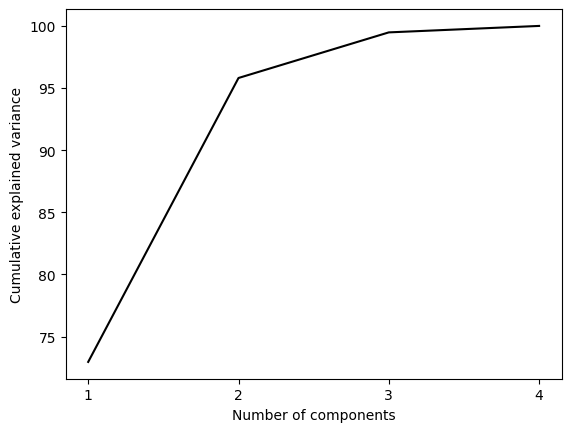

In [30]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i/eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1, n_features+1), cum_explained_variance, '-0')
plt.xticks(np.arange(1, n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

# 6: Proyeksikan data

In [32]:
X_proj = X_std.dot(W.T)

print(X_proj.shape)
print(X.shape)

(150, 2)
(150, 4)


Di sini, kita memvisualisasikan data yang ditransformasikan dalam ruang PCA dari dua PC pertama, yakni PC1 dan PC2.

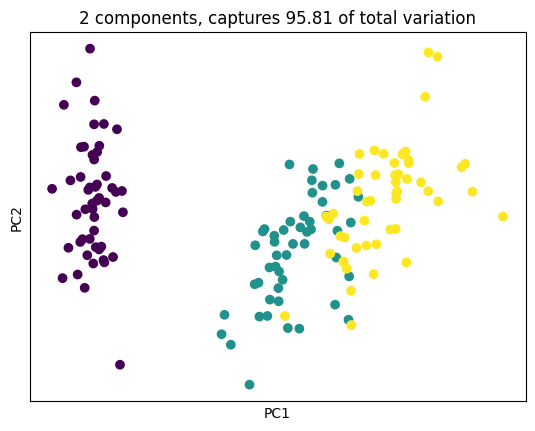

In [33]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {} of total variation'.format(cum_explained_variance[1]))
plt.show()

# PCA with Scikit-Learn


Components: 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
Explained variance ratio: 
 [0.72962445 0.22850762]
Cumulative explained variance: 
 [0.72962445 0.95813207]
Transformed data shape:  (150, 2)


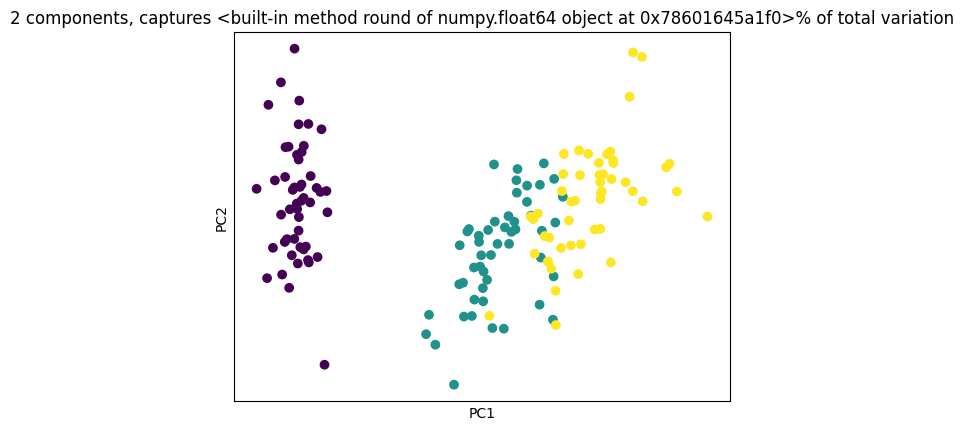

In [38]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_std)

print('Components: \n', pca.components_)
print('Explained variance ratio: \n', pca.explained_variance_ratio_)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance: \n', cum_explained_variance)

X_pca = pca.transform(X_std) #Menerapkan reduksi dimensi ke X
print('Transformed data shape: ', X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {}% of total variation'.format(cum_explained_variance[1].round))
plt.show()